In [354]:
from stages.stage3_ea_analysis.create_image.analyse_population import (
    load_population,
    parse_population,
)
from pathlib import Path
import os
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from rdkit.DataStructs import FingerprintSimilarity
import itertools as it
from rdkit.Chem import AllChem as rdkit
from matplotlib import pyplot as plt
%autoreload 2
%matplotlib inline


In [355]:
def get_tsne(pop, fps):
    tsne = TSNE(
        n_components=2,
        metric=taminoto_dist,
        perplexity=20,
        learning_rate=100.0,
        init='pca',
    )
    transform = tsne.fit_transform(fps, 1024)
    return transform




In [25]:
def taminoto_dist(a, b):
    dotprod = np.dot(a, b)
    tc = dotprod / (np.dot(a, a) + np.dot(b, b) - dotprod)
    return tc

In [26]:
def fingerprint_cage(mol):
    '''
    Gets Morgan fingerprint bit counts.
    '''
    info = {}
    fp = rdkit.GetMorganFingerprintAsBitVect(
        mol=mol,
        radius=8,
        nBits=1024,
        bitInfo=info,
    )
    fp = list(fp)
    for bit, activators in info.items():
        fp[bit] = len(activators)
    return fp


In [5]:
pop_path = Path('/Users/stevenbennett/Box/Steven/Work/PhD/Work/main_projects/synthetic_accessibility_project/stages/stage3_ea_analysis/create_image/case_studies/case_study_1_shape_persistant/SCScore/coefficient_1/run9_finished/ea_run.log')
pop = load_population(str(pop_path))
pop = parse_population(pop)

New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - recording.
New generation - rec

In [10]:
fps = []
for sp in pop:
    for mem in sp:
        mol = mem.to_rdkit_mol()
        mol.UpdatePropertyCache()
        rdkit.GetSymmSSSR(mol)
        mol.GetRingInfo().NumRings()
        fps.append(np.array(fingerprint_cage(mol)))



In [46]:
tsne_data = get_tsne(pop, fps)

In [12]:
gens = list(range(len(pop)))
gen_colors = np.repeat(gens, len(pop[0]))

In [47]:
d = {'X': tsne_data[:,0], 'y': tsne_data[:,1], 'colors': gen_colors}
df = pd.DataFrame.from_dict(d)

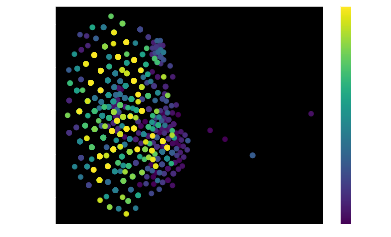

In [48]:
ax1 = df.plot.scatter(
    x='X',
    y='y',
    c='colors',
    colormap='viridis',
)

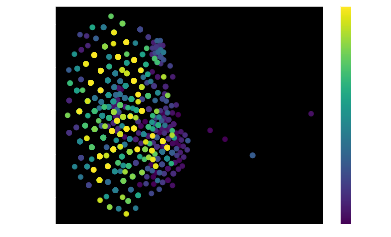

In [49]:
ax1.figure

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca_plot = PCA(n_components=2)
pca_data = pca_plot.fit_transform(fps)

In [18]:
d = {'X': pca_data[:,0], 'y': pca_data[:,1], 'colors': gen_colors}
df = pd.DataFrame.from_dict(d)

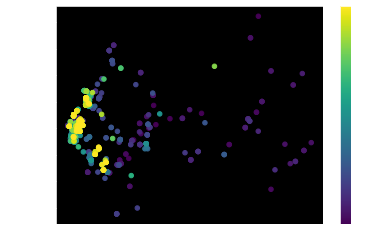

In [19]:
ax1 = df.plot.scatter(
    x='X',
    y='y',
    c='colors',
    colormap='viridis',
)

In [96]:
taminoto_dist(fps[10], fps[5])

0.13057589880159787

In [8]:
taminoto_dist(fps[10], fps[5])

cc1', ['aldehyde']), BuildingBlock('NC1CCC1N', ['primary_amine'])], topology_graph=cage.FourPlusSix(vertex_alignments={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}))],
 [ConstructedMolecule(building_blocks=[BuildingBlock('O=Cc1cc(C=O)nc(C=O)n1', ['aldehyde']), BuildingBlock('NC12CC(C34CC(N)(C3)C4)(C1)C2', ['primary_amine'])], topology_graph=cage.FourPlusSix(vertex_alignments={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0})),
  ConstructedMolecule(building_blocks=[BuildingBlock('O=Cc1c(O)c(C=O)c(O)c(C=O)c1O', ['aldehyde']), BuildingBlock('NC1COCC1N', ['primary_amine'])], topology_graph=cage.FourPlusSix(vertex_alignments={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0})),
  ConstructedMolecule(building_blocks=[BuildingBlock('O=Cc1cc(C=O)cc(C=O)c1', ['aldehyde']), BuildingBlock('NC1COCC1N', ['primary_amine'])], topology_graph=cage.FourPlusSix(vertex_alignments={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0})),
  ConstructedMolecule(buil

In [381]:

def plot_fitness(pop):
    d = {'fitness': [], 'fitness_values': [], 'generation': []}
    for i, sp in enumerate(pop):
        for mem in sp:
            d['fitness'].append(mem.fitness_value)
            d['fitness_values'].append(mem.fitness_vector)
            d['generation'].append(i)
    fitness_df = pd.DataFrame.from_dict(d)
    graphs = []
    attrs = ['fitness', 0, 1, 2, 3]
    for attr in attrs:
        df = pd.DataFrame()
        for i in range(len(pop)):
            if isinstance(attr, int):
                gen_vals = np.array(fitness_df.loc[fitness_df['generation'] == i]['fitness_values'].values)
                f = []
                for mem in gen_vals:
                    f.append(mem[attr])
                f = np.array(f)
                gen_vals = f
            else:
                gen_vals = fitness_df.loc[fitness_df['generation'] == i][attr].values
            # print(gen_vals)
            data = [
                        {
                            'Generation': i,
                            attr: max(list(filter(lambda x: x is not None, gen_vals))),
                            'Type': 'Max'
                        },
                        {
                            'Generation': i,
                            attr: min(list(filter(lambda x: x is not None, gen_vals))),
                            'Type': 'Min'
                        },
                        {
                            'Generation': i,
                            attr: np.mean(list(filter(lambda x: x is not None, gen_vals))),
                            'Type': 'Mean'
                        }
            ]
            df = df.append(data, ignore_index=True)
        plt.figure()
        ax = sns.scatterplot(
            x='Generation',
            y=attr,
            hue='Type',
            palette={
                'Min':palette[0],
                'Max':palette[1],
                'Mean':palette[2],
            },
            data=df,
            legend_out=True,
        )
        sns.despine()
        plt.legend(loc='upper_right')
        graphs.append(ax)
    return graphs

In [382]:
graphs = plot_fitness(pop)

AttributeError: 'PathCollection' object has no property 'legend_out'

TypeError: object of type 'AxesSubplot' has no len()

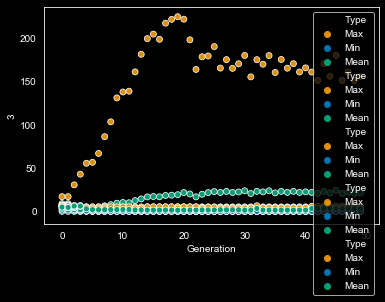